In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

# Set variables
# Empty list to hold the cities
cities = []
# URL to pull the API data
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [5]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
#for i, city in enumerate(cities):

#    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
#    # Create endpoint URL with each city.
#    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
#    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
#    record_count += 1

# Run an API request for each of the cities.
#    try:
        # Parse the JSON and retrieve data.
#        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
#        city_lat = city_weather["coord"]["lat"]
#        city_lng = city_weather["coord"]["lon"]
#        city_max_temp = city_weather["main"]["temp_max"]
#        city_humidity = city_weather["main"]["humidity"]
#        city_clouds = city_weather["clouds"]["all"]
#        city_wind = city_weather["wind"]["speed"]
#        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
#        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
#        city_data.append({"City": city.title(),
#                          "Lat": city_lat,
#                          "Lng": city_lng,
#                          "Max Temp": city_max_temp,
#                          "Humidity": city_humidity,
#                          "Cloudiness": city_clouds,
#                          "Wind Speed": city_wind,
#                          "Country": city_country,
#                          "Date": city_date})

# If an error is experienced, skip the city.
#    except:
#        print("City not found. Skipping...")
#        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | sao miguel do araguaia
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | mount isa
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | nome
Processing Record 8 of Set 1 | semey
Processing Record 9 of Set 1 | berlevag
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | senador jose porfirio
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | great falls
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | novoorsk
Processing Record 18 of Set 1 | pevek
Processing Record 19 of Set 1 | saravan
Processing Record 20 of Set 1 | elizabeth city
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | jamame
Processing Record 23 

Processing Record 40 of Set 4 | saldanha
Processing Record 41 of Set 4 | port blair
Processing Record 42 of Set 4 | roma
Processing Record 43 of Set 4 | chala
Processing Record 44 of Set 4 | provideniya
Processing Record 45 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 46 of Set 4 | naze
Processing Record 47 of Set 4 | shubarshi
Processing Record 48 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 49 of Set 4 | kingman
Processing Record 50 of Set 4 | torbay
Processing Record 1 of Set 5 | sangar
Processing Record 2 of Set 5 | melfort
Processing Record 3 of Set 5 | ilam
Processing Record 4 of Set 5 | contamana
Processing Record 5 of Set 5 | camacha
Processing Record 6 of Set 5 | san pedro
Processing Record 7 of Set 5 | novyy urengoy
Processing Record 8 of Set 5 | cockburn town
Processing Record 9 of Set 5 | nha trang
Processing Record 10 of Set 5 | klaksvik
Processing Record 11 of Set 5 | grand river south east
City not found. Skipping...
Proc

Processing Record 31 of Set 8 | aksu
Processing Record 32 of Set 8 | opuwo
Processing Record 33 of Set 8 | kununurra
Processing Record 34 of Set 8 | gusinoye ozero
Processing Record 35 of Set 8 | letterkenny
Processing Record 36 of Set 8 | manado
Processing Record 37 of Set 8 | xuddur
Processing Record 38 of Set 8 | matara
Processing Record 39 of Set 8 | namibe
Processing Record 40 of Set 8 | tigre
Processing Record 41 of Set 8 | nefteyugansk
Processing Record 42 of Set 8 | inhambane
Processing Record 43 of Set 8 | nyurba
Processing Record 44 of Set 8 | husavik
Processing Record 45 of Set 8 | ancud
Processing Record 46 of Set 8 | pitimbu
Processing Record 47 of Set 8 | marawi
Processing Record 48 of Set 8 | seydi
Processing Record 49 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 50 of Set 8 | vanimo
Processing Record 1 of Set 9 | camana
Processing Record 2 of Set 9 | kita
Processing Record 3 of Set 9 | auki
Processing Record 4 of Set 9 | bakchar
Processing Record 

Processing Record 19 of Set 12 | marabba
Processing Record 20 of Set 12 | haines junction
Processing Record 21 of Set 12 | sari
Processing Record 22 of Set 12 | puerto madero
Processing Record 23 of Set 12 | noumea
Processing Record 24 of Set 12 | terney
Processing Record 25 of Set 12 | mayo
Processing Record 26 of Set 12 | liepaja
Processing Record 27 of Set 12 | kyren
Processing Record 28 of Set 12 | verkhoyansk
Processing Record 29 of Set 12 | chagda
City not found. Skipping...
Processing Record 30 of Set 12 | katobu
Processing Record 31 of Set 12 | kumluca
Processing Record 32 of Set 12 | basoko
Processing Record 33 of Set 12 | ust-maya
Processing Record 34 of Set 12 | el alto
Processing Record 35 of Set 12 | birjand
Processing Record 36 of Set 12 | chapais
Processing Record 37 of Set 12 | faya
Processing Record 38 of Set 12 | gorlice
Processing Record 39 of Set 12 | guangyuan
Processing Record 40 of Set 12 | haibowan
City not found. Skipping...
Processing Record 41 of Set 12 | ull

In [9]:
len(city_data)

578

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,76.50,86,90,1.01,US,2021-07-25 16:44:16
1,Kruisfontein,-34.0033,24.7314,55.89,48,51,1.14,ZA,2021-07-25 16:42:35
2,Sao Miguel Do Araguaia,-13.2750,-50.1628,91.53,22,2,6.82,BR,2021-07-25 16:47:35
3,Punta Arenas,-53.1500,-70.9167,39.31,81,20,14.97,CL,2021-07-25 16:47:35
4,Mount Isa,-20.7333,139.5000,51.57,37,4,1.14,AU,2021-07-25 16:46:42
5,Kapaa,22.0752,-159.3190,79.12,84,90,1.01,US,2021-07-25 16:47:36
6,Nome,64.5011,-165.4064,48.27,87,90,9.22,US,2021-07-25 16:45:54
7,Semey,50.4111,80.2275,80.82,34,0,8.95,KZ,2021-07-25 16:47:36
8,Berlevag,70.8578,29.0864,48.20,82,100,19.44,NO,2021-07-25 16:47:36
9,Tasiilaq,65.6145,-37.6368,46.56,87,67,2.66,GL,2021-07-25 16:47:37


In [11]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2021-07-25 16:44:16,41.3712,-73.4140,76.50,86,90,1.01
1,Kruisfontein,ZA,2021-07-25 16:42:35,-34.0033,24.7314,55.89,48,51,1.14
2,Sao Miguel Do Araguaia,BR,2021-07-25 16:47:35,-13.2750,-50.1628,91.53,22,2,6.82
3,Punta Arenas,CL,2021-07-25 16:47:35,-53.1500,-70.9167,39.31,81,20,14.97
4,Mount Isa,AU,2021-07-25 16:46:42,-20.7333,139.5000,51.57,37,4,1.14
5,Kapaa,US,2021-07-25 16:47:36,22.0752,-159.3190,79.12,84,90,1.01
6,Nome,US,2021-07-25 16:45:54,64.5011,-165.4064,48.27,87,90,9.22
7,Semey,KZ,2021-07-25 16:47:36,50.4111,80.2275,80.82,34,0,8.95
8,Berlevag,NO,2021-07-25 16:47:36,70.8578,29.0864,48.20,82,100,19.44
9,Tasiilaq,GL,2021-07-25 16:47:37,65.6145,-37.6368,46.56,87,67,2.66


In [12]:
# Create the output file (CSV).
#output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
#city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

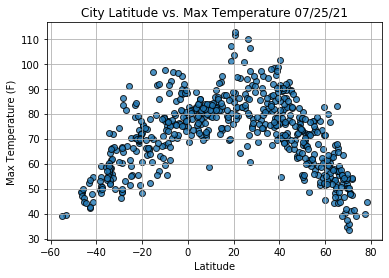

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Max_Temps.png")

# Show plot.
plt.show()

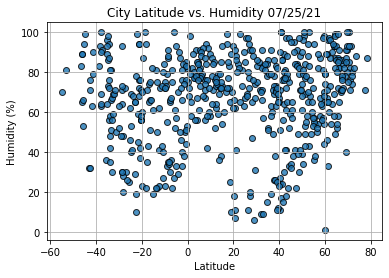

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Humidity.png")
# Show plot.
plt.show()

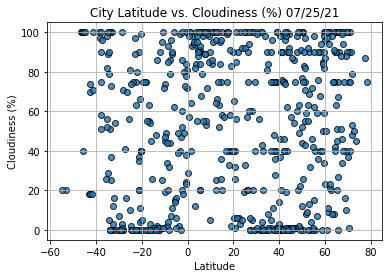

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Cloudiness.png")
# Show plot.
plt.show()

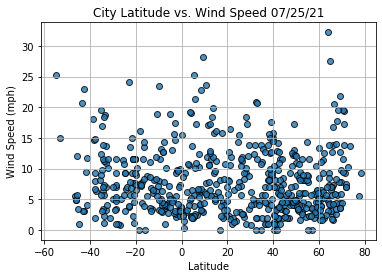

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Wind_Speed.png")
# Show plot.
plt.show()

In [39]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is: {r_value:.3f}")

In [40]:
index13 = city_data_df.loc[13]
index13

City                       Castro
Country                        BR
Date          2021-07-25 16:47:38
Lat                      -24.7911
Lng                      -50.0119
Max Temp                    70.18
Humidity                       40
Cloudiness                      2
Wind Speed                   9.26
Name: 13, dtype: object

In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

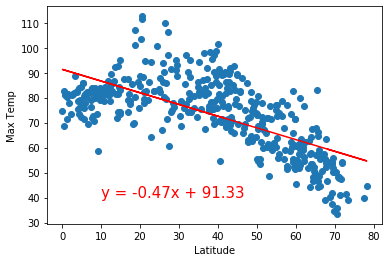

The r-value is: -0.663


In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

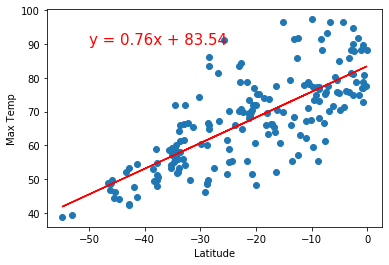

The r-value is: 0.757


In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

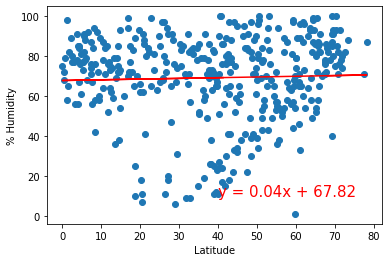

The r-value is: 0.034


In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

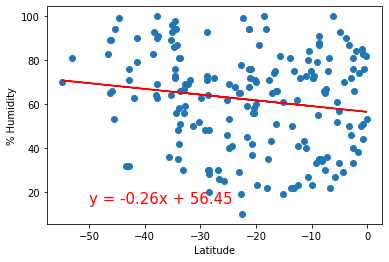

The r-value is: -0.160


In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

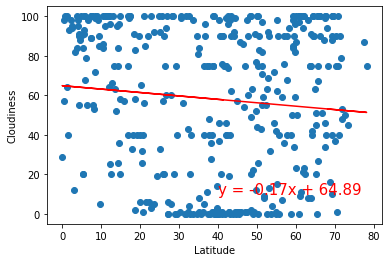

The r-value is: -0.097


In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,10))

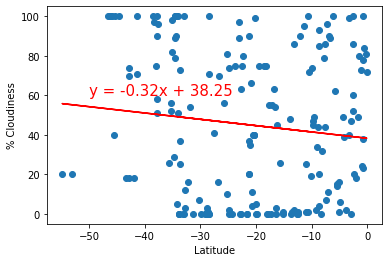

The r-value is: -0.117


In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

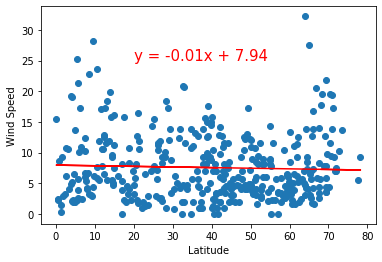

The r-value is: -0.039


In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,25))

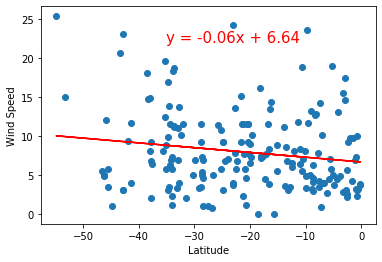

The r-value is: -0.164


In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-35,22))